In [2]:
#install.packages("readxl")
library("readxl")
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [7]:

#data = read_excel("fig2-data1.xlsx")
#data = read_excel("https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5705217/bin/elife-29944-fig2-data1.xlsx")

temp.file <- paste(tempfile(),".xlsx")
download.file("https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5705217/bin/elife-29944-fig2-data1.xlsx", temp.file, mode = "wb")

data <- read_excel(temp.file)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Saving 6.67 x 6.67 in image


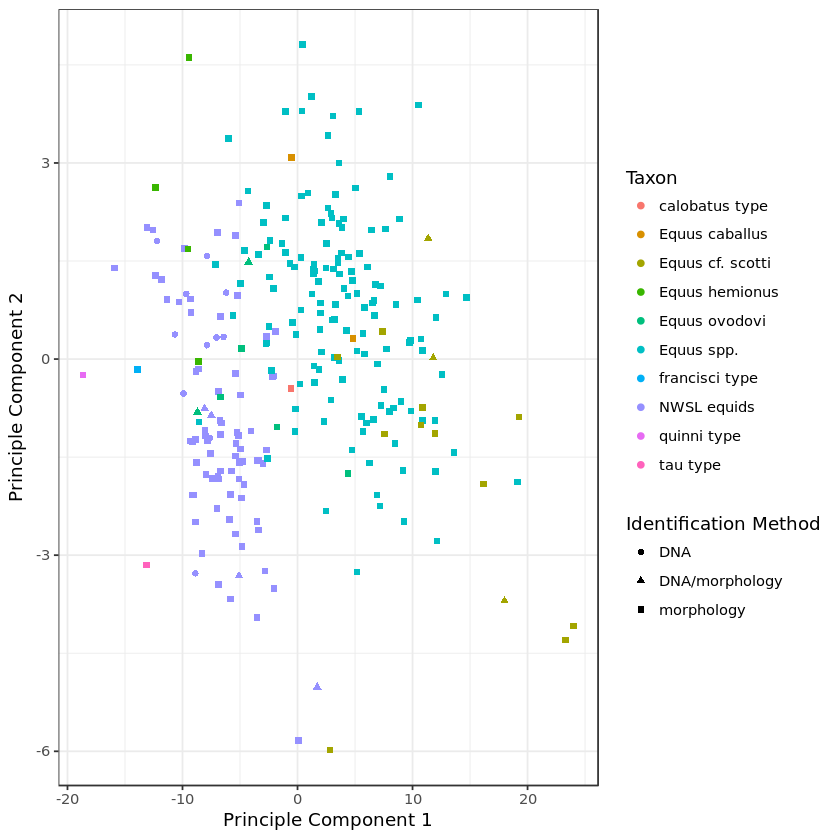

In [8]:
meta = data[,c(1,8:18)]

# meta = drop_na(meta)
meta = na.omit(meta)


meta$`GL: Greatest Length` = as.double(meta$`GL: Greatest Length`)
meta$`Pb: Proximal Breadth` = as.double(meta$`Pb: Proximal Breadth`)
meta$`Dp: Proximal depth` = as.double(meta$`Dp: Proximal depth`)
meta$`SD: Midshaft breadth` = as.double(meta$`SD: Midshaft breadth`)
meta$`Midshaft depth (#4)` = as.double(meta$`Midshaft depth (#4)`)
meta$`Distal articular breadth at midline (#11)` = as.double(meta$`Distal articular breadth at midline (#11)`)
meta$`Distal metaphyseal breadth (#10)` = as.double(meta$`Distal metaphyseal breadth (#10)`)
meta$`Maximum depth of distal "keel" (#12)` = as.double(meta$`Maximum depth of distal "keel" (#12)`)
meta$`Minimum depth of medial condyle` = as.double(meta$`Minimum depth of medial condyle`)
meta$`Maximum depth of medial condyle (#14)` = as.double(meta$`Maximum depth of medial condyle (#14)`)

Taxon = meta$Taxon
Iden =meta$`Identification based on`
meta = meta[2:11]

meta4 = meta[,1:4]
metaR = meta[,5:10]

meta4 = as.matrix(meta4)
metaR = as.matrix(metaR)

f1 <- function(vec) {
  m <- mean(vec, na.rm = TRUE)
  vec[is.na(vec)] <- m
  return(vec)
}

meta4 = apply(meta4,2,f1)
metaR = apply(metaR,2,f1)


metaPC = prcomp(metaR)
meta3 =  as.tibble(metaPC$x)
meta3 = mutate(meta3, Taxon=Taxon, `Identification Method`=Iden)

g = ggplot(meta3, aes(x=PC1, y=PC2, color=Taxon, shape=`Identification Method`)) +
  geom_point() + theme_bw() + xlab("Principle Component 1") + ylab("Principle Component 2")

print(g)

ggsave("graph.pdf")